### Librerias

In [115]:
using SymPy
using Interpolations
using Plots
using CSV
using DataFrames
using Statistics
using PyCall
using Polynomials

Obtener input del d√≠a para la predicci√≥n.

In [116]:
println("Introduzca el punto (d√≠a) a evaluar.")
day = try
    parse(Float64, readline())
catch
    "8"
end

Introduzca el punto (d√≠a) a evaluar.


"8"

### Datos de temperaturas por Dia

In [117]:
function GetTemperaturas(data)
    promedios = []
    for fila in eachrow(data)
        #Datos de temperatura a partir de la segunda columna.
        #Mean para calcular el promedio de las temperaturas dentro de la fila.
        promedio = mean(fila[2:end])
        push!(promedios, promedio)
    end
    return promedios
end

#Leer el archivo CSV
data = CSV.read("temperaturas.csv", DataFrame, header=0)

#Dias en la primera columna.
dias = data[:, 1] 

temperaturas = GetTemperaturas(data)

7-element Vector{Any}:
 23.333333333333332
 24.0
 25.0
 25.666666666666668
 27.0
 22.0
 23.0

### Funciones para Calcular Rangos de dias

In [118]:
#Funci√≥n para obtener el rango de d√≠as
function DiasInterpolados2(punto)
    if punto < 7
        return range(minimum(dias), 7, length=20)
    else
        return range(minimum(dias), punto, length=20)
    end
end

function DiasInterpolados()
    return range(minimum(dias), 7, length=20)
end


DiasInterpolados (generic function with 1 method)

### Interpolaci√≥n de Taylor

## Explicaci√≥n del C√≥digo (Procedimiento)

### Definici√≥n de la Funci√≥n `rango_dias_interpolados(punto_evaluacion)`
Esta funci√≥n determina el rango de d√≠as en los que se realizar√° la interpolaci√≥n.
- Si el punto de evaluaci√≥n es menor que 7, el rango se extiende desde el d√≠a m√≠nimo hasta el d√≠a 7.
- De lo contrario, el rango se extiende desde el d√≠a m√≠nimo hasta el punto de evaluaci√≥n.

### Construcci√≥n de la Funci√≥n Interpolada (Lagrange)
La funci√≥n `funcion_interpolada` se construye utilizando el m√©todo de interpolaci√≥n de Lagrange. Para cada d√≠a, se calcula un t√©rmino que se suma a la funci√≥n interpolada.

### Par√°metros para el Polinomio de Taylor
Se solicita al usuario que ingrese el punto de evaluaci√≥n y el grado del polinomio de Taylor.

### Funci√≥n `polinomio_taylor(funcion, punto, grado)`
Esta funci√≥n calcula el polinomio de Taylor alrededor del punto de evaluaci√≥n para la funci√≥n dada y con el grado especificado. Se utilizan las derivadas de la funci√≥n en el punto de evaluaci√≥n para calcular los t√©rminos del polinomio.

### Calculando el Polinomio de Taylor
Se calcula el polinomio de Taylor utilizando la funci√≥n `polinomio_taylor` con los par√°metros especificados.

### Predicci√≥n de Temperatura
Se solicita al usuario que ingrese el valor que desea predecir. Luego, se eval√∫a el polinomio de Taylor en este valor para obtener la predicci√≥n de temperatura.

### Graficando los Resultados
Se grafican los datos originales, la funci√≥n interpolada y el polinomio de Taylor para visualizar los resultados.

### F√≥rmula Utilizada:

La f√≥rmula utilizada para calcular el polinomio de Taylor es:

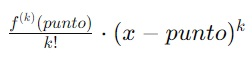


### donde: 

- `f^(k)` (punto) representa la `k-enesima derivada` de la funci√≥n evaluada en el punto y  grado es el grado del polinomio de Taylor.

### C√≥digo Completo

In [119]:
# Polinomio de Taylor
# Definir la variable simb√≥lica x
x = symbols("x")

# Construir la funci√≥n interpolada (Lagrange)
n = length(dias)
funcion = 0
for i in 1:n
    term = temperaturas[i]
    for j in 1:n
        if i != j
            term *= (x - dias[j]) / (dias[i] - dias[j])
        end
    end
    funcion += term
end

# Par√°metros para el polinomio de Taylor
print("Coloque punto a evaluar: ")
punto = parse(Int64, readline())
print("coloque grado: ")
grado_taylor = parse(Int64, readline())

# Funci√≥n para calcular el polinomio de Taylor
function taylor(func, punto, grado)
    polinomio_taylor = 0
    for k in 0:grado
        derivada_k = diff(func, x, k)
        derivada_punto = subs(derivada_k, x, punto)
        termino_k = (derivada_punto / factorial(k)) * (x - punto)^k
        polinomio_taylor += termino_k
    end
    return simplify(polinomio_taylor)
end

# Calcular el polinomio de Taylor
polinomio_taylor = taylor(funcion, punto, grado_taylor)

# Crear funciones para evaluar
funcion_eval = lambdify(funcion, [x])
polinomio_taylor_eval = lambdify(polinomio_taylor, [x])

# Crear datos para graficar

#colocar prediccion por teclado
prediccion_taylor_teclado = day

#Asignar valores para graficar
x_vals = DiasInterpolados2(prediccion_taylor_teclado)
y_vals_interp = funcion_eval.(x_vals)
y_vals_taylor = polinomio_taylor_eval.(x_vals)

#imprimir Prediccion
println("la prediccion de la temperatura por teclado es: ", polinomio_taylor_eval(prediccion_taylor_teclado))

# Graficar
plot(dias, temperaturas, seriestype=:scatter, label="Datos Originales", markershape=:circle)
plot!(x_vals, y_vals_interp, label="Funci√≥n Interpolada")
plot!(x_vals, y_vals_taylor, label="Polinomio de Taylor")
xlabel!("D√≠as")
ylabel!("Temperatura (¬∞C)")
title!("Interpolaci√≥n y Polinomio de Taylor")

Coloque punto a evaluar: 

UndefVarError: UndefVarError: `execute_msg` not defined

### Interpolaci√≥n de Lagrange

### La f√≥rmula de Lagrange que se est√° utilizando en el c√≥digo es la siguiente:

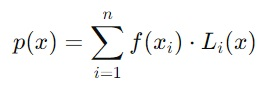  

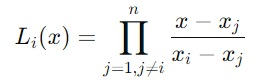


### Donde:

- `p(x)` = es el polinomio de Lagrange
- `n` es el numero de puntos dados
- `Li(x)` es el t√©rmino de Lagrange para el punto xi dado por:


    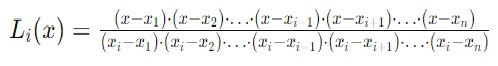
    

- `f(xi)` es el valor de la funcion xi que en este caso es la temperatura registrada en el d√≠a xi

Esta f√≥rmula calcula el polinomio de Lagrange que pasa por todos los puntos de datos dados y se utiliza para predecir valores intermedios entre estos puntos.


### Descripci√≥n del C√≥digo

#### Inicializaci√≥n de Variables
- `n`: N√∫mero de puntos de datos.
- `x`: Variable simb√≥lica.
- `polinomio`: Inicializaci√≥n del polinomio de Lagrange.

#### Funci√≥n DiasInterpolados
Esta funci√≥n determina el rango de d√≠as sobre los cuales se realizar√° la interpolaci√≥n.
- Si el d√≠a deseado est√° m√°s all√° del s√©ptimo d√≠a, el rango se extiende hasta ese d√≠a, de lo contrario, se extiende hasta el d√≠a 7.

#### C√°lculo del Polinomio de Lagrange
Se itera sobre cada punto de datos para calcular los t√©rminos de Lagrange y el polinomio resultante. Se almacenan los denominadores de Lagrange en el vector `divisorL`.

#### Simplificaci√≥n del Polinomio de Lagrange
Se simplifica el polinomio resultante.

#### Evaluaci√≥n Num√©rica del Polinomio de Lagrange
Se define una funci√≥n que permite evaluar el polinomio en un valor espec√≠fico de `x`.

#### Ingreso de la Predicci√≥n por Teclado
El usuario ingresa el valor del d√≠a para el cual se desea realizar la predicci√≥n.

#### Generaci√≥n de Puntos para la Gr√°fica
Se determina el rango de d√≠as sobre los cuales se graficar√°n los resultados de la interpolaci√≥n.

#### Predicci√≥n e Impresi√≥n
Se realiza la predicci√≥n de temperatura para el d√≠a ingresado por el usuario y se imprime el resultado.

#### Gr√°fico
Se grafican los datos originales, la interpolaci√≥n de Lagrange y los puntos de datos registrados.

### C√≥digo Completo

In [120]:
# Polinomio de Lagrange
n = length(dias)  # N√∫mero de puntos de datos
x = symbols("x")  # Variable simb√≥lica x
polinomio = 0  # Inicializaci√≥n del polinomio de Lagrange

# C√°lculo del polinomio de Lagrange
for i in 1:n
    # Termino de Lagrange
    numerador = 1
    denominador = 1

    for j in 1:n
        if j != i
            numerador *= (x - dias[j])  # Producto acumulativo para el numerador de Lagrange
            denominador *= (dias[i] - dias[j])  # Producto acumulativo para el denominador de Lagrange
        end
    end

    terminoLi = numerador / denominador  # T√©rmino de Lagrange
    polinomio += terminoLi * temperaturas[i]  # Actualizaci√≥n del polinomio de Lagrange
    
end

# Simplificaci√≥n del polinomio de Lagrange
polisimple = simplify(polinomio)

# Evaluaci√≥n num√©rica del polinomio de Lagrange
Lagrange = lambdify(polinomio, [x])

# Ingreso de la predicci√≥n por teclado
punto = day

# Puntos para la gr√°fica
pdias = DiasInterpolados2(punto)
ptemperaturas = Lagrange.(pdias)


# Predicci√≥n e impresi√≥n
println("La predicci√≥n de la temperatura es: ", Lagrange(punto))

# Gr√°fica
plot(pdias, ptemperaturas, xlabel="D√≠as", ylabel="Temperaturas", label="Interpolaci√≥n de Lagrange")
scatter!(dias, temperaturas, label="Puntos de datos", legend=:bottomright)
title!("Interpolaci√≥n y Polinomio de Lagrange")

MethodError: MethodError: no method matching isless(::String, ::Int64)

Closest candidates are:
  isless(!Matched::Missing, ::Any)
   @ Base missing.jl:87
  isless(::Any, !Matched::PyObject)
   @ PyCall C:\Users\sonyg\.julia\packages\PyCall\1gn3u\src\pyoperators.jl:76
  isless(!Matched::PyObject, ::Any)
   @ PyCall C:\Users\sonyg\.julia\packages\PyCall\1gn3u\src\pyoperators.jl:75
  ...


### Interpolaci√≥n de Hermite:

La interpolaci√≥n de Hermite es un m√©todo en matem√°ticas que se utiliza paraconstruir un polinomio 
que no solo coincide con los valores de una funci√≥n en un conjunto dado de puntos, sino que tambi√©n
coincide con las derivadas de la funci√≥n en esos puntos. Este tipo de interpolaci√≥n es
especialmente √∫til cuando se conoce no solo la posici√≥n de los puntos, sino tambi√©n la
pendiente (o derivada) de la curva en esos puntos. Se puede utilizar para una variedad de prop√≥sitos, incluida la aproximaci√≥n de funciones y la generaci√≥n de curvas que pasan a trav√©s de puntos de datos espec√≠ficos.

F√≥rmula: Dado un conjunto de n puntos de datos (xi,yi)(xi‚Äã,yi), donde xi son las coordenadas "x" y yi son las coordenadas "y", y se conocen las derivadas f‚Ä≤(xi) en estos puntos, la f√≥rmula para el polinomio interpolante de Hermite H(x) es la siguiente:

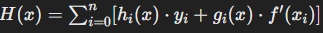

D√≥nde hi(x) son los polinomios de Hermite de interpolaci√≥n y gi(x) son los polinomios de Hermite de interpolaci√≥n para las derivadas.

### C√≥mo se implement√≥ la f√≥rmula en el c√≥digo:


`"function calcular_derivadas(x, y)":` Esta funci√≥n calcula las derivadas de la funci√≥n de temperatura respecto a los d√≠as utilizando el m√©todo de diferencias finitas. Esto se hace mediante el uso de la funci√≥n gradient de NumPy para calcular la derivada.

`"function calculo_diferencias(nodos, funcion, funcion_derivada)":` Esta funci√≥n calcula las diferencias divididas necesarias para la interpolaci√≥n de Hermite. Toma como entrada los nodos (en este caso, los d√≠as), la funci√≥n (en este caso, las temperaturas), y las derivadas de la funci√≥n en esos nodos. Despu√©s, se usan las diferencias divididas para generar los coeficientes necesarios para el polinomio de Hermite.

`"function hermite_polinomio(coeficientes , nodosDuplicados)":` Agarra los coeficientes calculados por la funci√≥n anterior para generar el polinomio interpolante de Hermite.

`"function hermite(polinomio, diasx)":`  Esta funci√≥n toma el polinomio de Hermite generado y un conjunto de d√≠as. Despu√©s, se eval√∫a el polinomio en estos d√≠as para obtener las temperaturas interpoladas.

Luego usando la misma "function hermite(polinomio, diasx)" introducimos como par√°metro el d√≠a que queramos para predecir su temperatura. Finalmente graficamos los datos originales junto a los datos interpolados. 






La predicci√≥n de la temperatura para el d√≠a 8 es: Sym{PyObject}[0.0324074074074074*(8 - 7)*(8 - 6)*(8 - 5)*(8 - 4)*(8 - 3)*(8 - 2) - 0.2*(8 - 7)*(8 - 6)*(8 - 5)*(8 - 4)*(8 - 3)*(8 - 1) + 0.520833333333333*(8 - 7)*(8 - 6)*(8 - 5)*(8 - 4)*(8 - 2)*(8 - 1) - 0.712962962962963*(8 - 7)*(8 - 6)*(8 - 5)*(8 - 3)*(8 - 2)*(8 - 1) + 0.5625*(8 - 7)*(8 - 6)*(8 - 4)*(8 - 3)*(8 - 2)*(8 - 1) - 0.183333333333333*(8 - 7)*(8 - 5)*(8 - 4)*(8 - 3)*(8 - 2)*(8 - 1) + 0.0319444444444444*(8 - 6)*(8 - 5)*(8 - 4)*(8 - 3)*(8 - 2)*(8 - 1)] ¬∞C


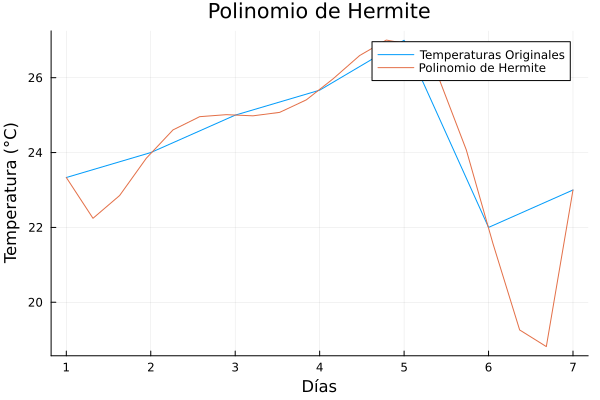

In [121]:

# Graficar los datos originales
plot(dias, temperaturas, xlabel="D√≠as", ylabel="Temperatura (¬∞C)", label="Temperaturas Originales")

# Importamos NumPy
np = pyimport("numpy")

# Funci√≥n para calcular derivadas usando diferencias finitas
function calcular_derivadas(x, y)
    # Convertimos los datos de los par√°metros de la funci√≥n a arrays de NumPy
    x_numpy = np.array(x)
    y_numpy = np.array(y)
    derivada_numpy = np.gradient(y_numpy,x_numpy) # Calcula la derivada (diferencia finita)
    # Convertir las derivadas de numpy a un arreglo de Julia
    dy = Float64.(derivada_numpy)
    return dy
end

# Usamos la funci√≥n "calcular_derivadas"
derivadas = calcular_derivadas(dias, temperaturas)


# Calcular diferencias divididas 
function calculo_diferencias(nodos, funcion, funcion_derivada)
    # Almacenamos el n√∫mero de nodos (puntos donde se intersectan las funciones y sus derivadas)
    numNodos = length(nodos) 
    #= Definimos los arreglos para nodos duplicados y matriz de diferencias divididas
    Sabiendo que undef significa que los elementos del arreglo no est√°n inicializados.
    Adem√°s, entendamos que lo necesario son 2*numNodos ya que en Hermite se duplican 
    los nodos orginales para la informaci√≥n tanto de la funci√≥n como la de su derivada.
    =#
    nodosDuplicados = Array{Float64}(undef, 2*numNodos) # 2*numNodos es el n√∫mero total de nodos duplicados que se necesitan. 
    matrizDif = Array{Float64}(undef, 2*numNodos, 2*numNodos) # 2*numNodos son el n√∫mero de filas y columnas de la matriz
    coeficientes = Array{Float64}(undef, 2*numNodos) # 2*numNodos son los coeficientes necesarios 

    
    for i in 0:(numNodos-1) # itera sobre los datos originales, desde 
        # Duplicamos los nodos y llenamos la matriz de diferencias divididas (c√°lculo de los coeficientes)
        nodosDuplicados[2*i + 1] = nodos[i+1] # Duplica datos originales y lo almacena para que cada
        nodosDuplicados[2*i + 2] = nodos[i+1] # nodo tenga una copia (representa su funci√≥n como su derivada)
        matrizDif[2*i+1,1] = funcion[i+1] # Llenan la primera columna de la matriz con 
        matrizDif[2*i+2, 1] = funcion[i+1] # nodos duplicados
        matrizDif[2*i+2, 2] = funcion_derivada[i+1] # Llena la segunda columna de la matriz con los valores de la derivadas en los nodos duplicados 
        
        #=
        Esta condici√≥n asegura que la siguiente operaci√≥n solo se 
        ejecute cuando i no sea igual a 0. Para evitar que cuando i=0,
        no se ejecute ya que no hay un nodo anterior con el cual comparar.
        =#
        if i != 0
            # Almacena en la segunda columna de la matriz el c√°lculo de la resta entre los valores de la funci√≥n
            # entre la resta de los valores del nodo duplicado 
            matrizDif[2*i+1,2] = (matrizDif[2*i+1,1] - matrizDif[2*i,1])/(nodosDuplicados[2*i+1] - nodosDuplicados[2*i])
        end
    end
    
    # Calculo de diferencias divididas para los dem√°s elementos
    for i in 2:(2*(numNodos-1)+1) # Itera desde la tercera fila hasta la √∫ltima (que son las que faltan)
        for j in 2:i # Itera en las columnas que faltan (desde la segunda columna hasta la fila actual "i")
            f = matrizDif[i+1,j] - matrizDif[i,j] # Numerador de la diferencia dividida (usando matriz de diferencias divididas)
            g = nodosDuplicados[i+1] - nodosDuplicados[i-j+1] # Denominador diferencia dividida (usando nodos duplicados)
            matrizDif[i+1,j+1] = f/g # Almacena la divisi√≥n de diferencias
        end
        # A partir de la diferencia ya almacenada, calcula los coeficientes (diagonal principal)
        coeficientes = [matrizDif[i, i] for i in 1:2*numNodos] 
    end
    # Retornamos lo que usaremos para construir el polinomio de Hermite 
    return [nodosDuplicados,coeficientes]
end


function hermite_polinomio(coeficientes , nodosDuplicados)
    grado = length(nodosDuplicados) - 1 # Resta 1 al total de nodos para calcular el grado del polinomio
    polinom = coeficientes[grado+1] # Inicia el polinomio con el coeficiente de mayor grado (es decir, t√©rmino independiente)

    # Itera desde el menor grado hasta el t√©rmino independiente
    for k in 1:grado
    # En cada iteraci√≥n, se agrega al polinomio un nuevo coeficiente 
        polinom = coeficientes[grado-k+1] + (x-nodosDuplicados[grado-k+1])*polinom
    end
    # Polinomio generado
    return polinom
end

# Almacenamos los nodos duplicados y los coeficientes necesarios para armar el polinomio de Hermite
resultadoDif = calculo_diferencias(dias, temperaturas , derivadas)

# Armamos el polinomio de Hermite donde los parametros son los coeficientes (resultadoDif[2])
# y los nodos duplicados (resultadoDif[1])
polinomioHerm = hermite_polinomio(resultadoDif[2] , resultadoDif[1])


# Toma como entrada el polinomio y los d√≠as en los que se quiera evaluar el polinomio. 
function hermite(polinomio, diasx)
    # Genera una lista de valores de temperatura interpolados para cada d√≠a.
    tempy = [polinomio.subs(x, xi) for xi in diasx]
    # NOTA:Se pudiera hacer sin ".subs" de la siguiente manera
    #tempy = [polyval(polinomio, diasx) for xi in diasx]. Pero no logro adaptarlo a este c√≥digo,
    # Pero tener presente que hay distintas maneras de realizar la lista de valores de temperaturas interpoladas
    return tempy
end

# Predicci√≥n de un nuevo d√≠a
dia_nuevo = day
prediccion_dia_8 = hermite(polinomio, dia_nuevo) # Como par√°metro ir√° el polinomio y el d√≠a en el que se quiera predecir la temperatura.
println("La predicci√≥n de la temperatura para el d√≠a $dia_nuevo es: $prediccion_dia_8 ¬∞C")


dias_interpolados = DiasInterpolados() # Funci√≥n DiasInterpolados() genera un rango de puntos para analizar entre¬†los¬†d√≠as
temperaturas_interpoladas = hermite(polinomio, dias_interpolados) # Calculamos temperaturas interpoladas
# Graficamos datos interpolados
plot!(dias_interpolados, temperaturas_interpoladas, label="Polinomio de Hermite", title="Polinomio de Hermite")


Interpolaci√≥n Polin√≥mica a Trozos

Formula de interpolaci√≥n lineal usada en el ejercicio:

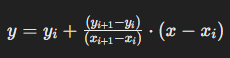

Donde:
- y es el valor interpolado que queremos encontrar.
- x es el punto en el cual queremos interpolar.
- ùë•ùëñ+1 son los puntos conocidos entre los cuales estamos interpolando.
- ùë¶ùëñ y ùë¶ùëñ+1 son los valores conocidos en ùë•ùëñ y ùë•ùëñ+1, respectivamente.

**y = temperaturas**

**x = dias**

Temperatura en el d√≠a 8.0 seg√∫n la interpolaci√≥n lineal a trozos: 24.0


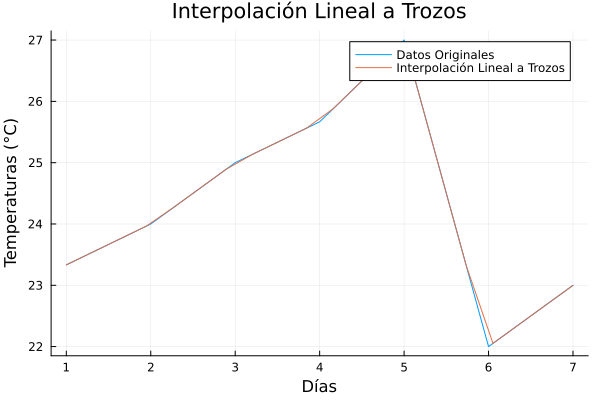

In [35]:
# Funci√≥n de interpolaci√≥n lineal a trozos
function InterpolacionLinealTrozos(dias, temperaturas, cantidad_interpolar)
    # Obtiene el valor de las listas y busca el valor interpolado de la temperatura a partir de la cantidad de interpolaci√≥n
    # Encontrar el intervalo correcto
    for i in 1:length(dias)-1
        # Recorre los dias hasta encontrar el intervalo de dias que corresponda a la cantidad de interpolaci√≥n
        if cantidad_interpolar >= dias[i] && cantidad_interpolar <= dias[i+1]
            # Calcular la interpolaci√≥n lineal
            return temperaturas[i] + ((temperaturas[i+1] - temperaturas[i]) * (cantidad_interpolar - dias[i]) / (dias[i+1] - dias[i]))
        end
    end
    # Casos usados para obtener la interpolaci√≥n en dias que no estan incluidos dentro de la lista inicial de dias, predicci√≥n de datos
    # Caso especial: extrapolaci√≥n hacia la izquierda
    if cantidad_interpolar < dias[1]
        return temperaturas[1] + ((temperaturas[2] - temperaturas[1]) * (cantidad_interpolar - dias[1]) / (dias[2] - dias[1]))
    end
    # Caso especial: extrapolaci√≥n hacia la derecha
    if cantidad_interpolar > dias[end]
        return temperaturas[end] + ((temperaturas[end] - temperaturas[end-1]) * (cantidad_interpolar - dias[end]) / (dias[end] - dias[end-1]))
    end
    return NaN  # Si la cantidad de interpolaci√≥n est√° fuera del rango de dias
end

println("Temperatura en el d√≠a $day seg√∫n la interpolaci√≥n lineal a trozos: ", InterpolacionLinealTrozos(dias, temperaturas, day))

# Crear puntos interpolados
dias_interpolados = DiasInterpolados()
temperaturas_interpoladas = [InterpolacionLinealTrozos(dias, temperaturas, cantidad_interpolar) for cantidad_interpolar in dias_interpolados]

# Graficar los puntos originales y la interpolaci√≥n
plot(dias, temperaturas, label="Datos Originales", xlabel="D√≠as", ylabel="Temperaturas (¬∞C)", title="Interpolaci√≥n Lineal a Trozos")
plot!(dias_interpolados, temperaturas_interpoladas, label="Interpolaci√≥n Lineal a Trozos")
